<a href="https://colab.research.google.com/github/RubenMcCarty/Big-Data-/blob/main/Lab_02_Acciones_RDD_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Acciones sobre un RDD en Spark

# tipos de acciones
 * Drive
 * Distributed

# Acciones: función reduce

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/ull
!wget -q  https://archive.apache.org/dist/spark/spark-3.2.3/spark-3.2.3-bin-hadoop3.2.tgz

In [2]:
# descompremir la version de spark
!tar xf spark-3.2.3-bin-hadoop3.2.tgz

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.3-bin-hadoop3.2"

In [4]:
# Instalar la librería findspark
!pip install -q findspark

In [5]:
# Instalar pyspark
!pip install -q pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [6]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [7]:
rdd = sc.parallelize([2,4,6,8])

In [8]:
rdd.reduce(lambda x,y: x + y)

20

In [9]:
rdd1 = sc.parallelize([1,2,3,4])

In [10]:
rdd1.reduce(lambda x,y: x * y)

24

# Acciones: función count

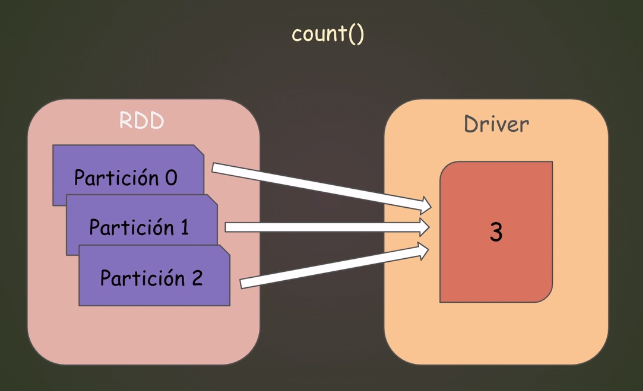

In [11]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [12]:
rdd = sc.parallelize(['j', 'o', 's', 'e'])

In [13]:
rdd.count()

4

In [14]:
rdd1 = sc.parallelize([item for item in range(10)])

In [15]:
rdd1.count()

10

# Acciones: función collect

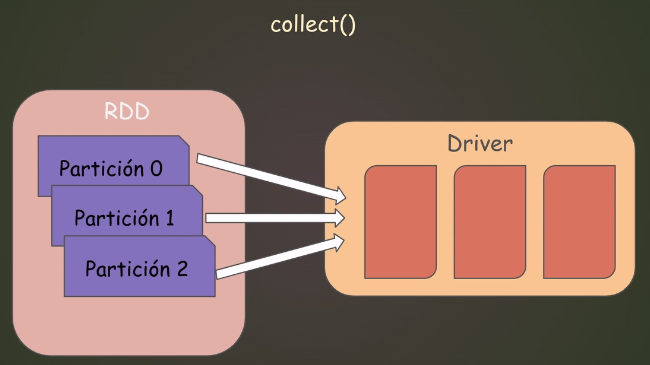

In [16]:
# Acciones: función collect

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [17]:
rdd = sc.parallelize('Hola Apache Spark!'.split(' '))

In [18]:

rdd.collect()

['Hola', 'Apache', 'Spark!']

In [19]:
rdd1 = sc.parallelize([(item, item ** 2) for item in range(20)])

In [20]:
rdd1.collect()

[(0, 0),
 (1, 1),
 (2, 4),
 (3, 9),
 (4, 16),
 (5, 25),
 (6, 36),
 (7, 49),
 (8, 64),
 (9, 81),
 (10, 100),
 (11, 121),
 (12, 144),
 (13, 169),
 (14, 196),
 (15, 225),
 (16, 256),
 (17, 289),
 (18, 324),
 (19, 361)]

# Acciones: funciones take, max y saveAsTextFile

In [21]:
# Acciones: funciones take, max y saveAsTextFile

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [22]:
# take

rdd = sc.parallelize('La programación es bella'.split(' '))

In [23]:

rdd.take(2)

['La', 'programación']

In [24]:
rdd.take(4)

['La', 'programación', 'es', 'bella']

In [25]:
# max

rdd1 = sc.parallelize([item/(item + 1) for item in range(10)])

In [26]:
rdd1.max()

0.9

In [27]:
rdd1.collect()

[0.0,
 0.5,
 0.6666666666666666,
 0.75,
 0.8,
 0.8333333333333334,
 0.8571428571428571,
 0.875,
 0.8888888888888888,
 0.9]

In [28]:
# saveAsTextFile

In [29]:
rdd.collect()

['La', 'programación', 'es', 'bella']

In [30]:
rdd.saveAsTextFile('./rdd')

In [31]:
rdd.coalesce(1).saveAsTextFile('./rdd1')

# **ASPECTOS AVANZADOS SOBRE RDD**


# Almacenamiento en cache
* Almacenamiento en caché permite que spark conserve los datos en todos los calculos y operaciones

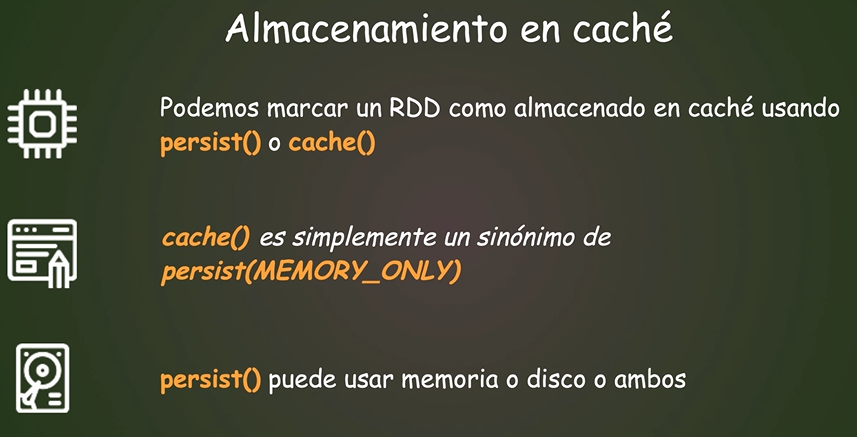

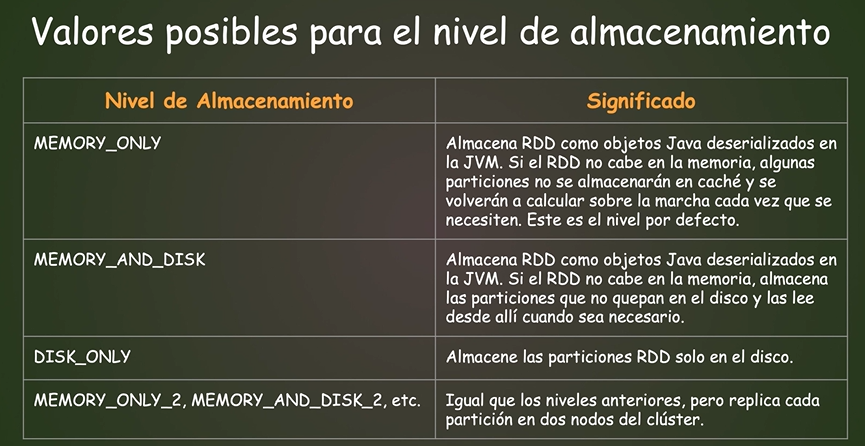

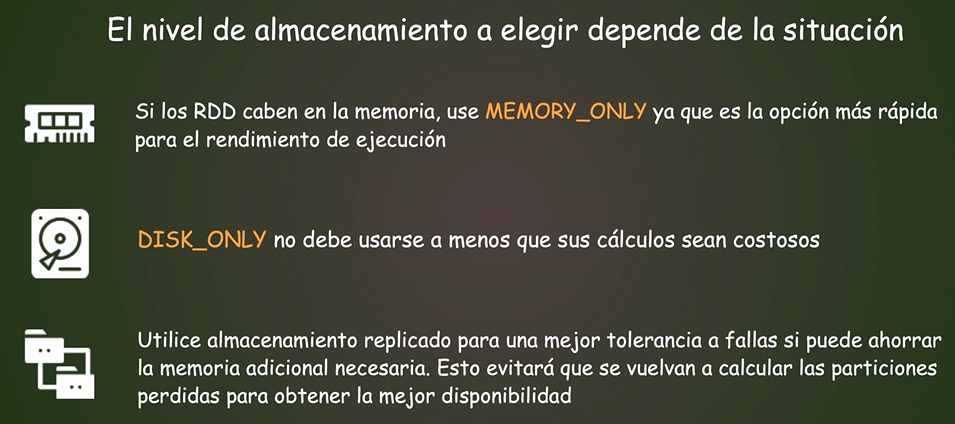

In [32]:
# Almacenamiento en caché

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [33]:
rdd = sc.parallelize([item for item in range(10)])

In [34]:
from pyspark.storagelevel import StorageLevel

In [35]:
rdd.persist(StorageLevel.MEMORY_ONLY)

ParallelCollectionRDD[23] at readRDDFromFile at PythonRDD.scala:274

In [36]:
# esto es para cambiar el nivel de persistencia
rdd.unpersist()

ParallelCollectionRDD[23] at readRDDFromFile at PythonRDD.scala:274

In [37]:
rdd.persist(StorageLevel.DISK_ONLY)

ParallelCollectionRDD[23] at readRDDFromFile at PythonRDD.scala:274

In [38]:
rdd.unpersist()

ParallelCollectionRDD[23] at readRDDFromFile at PythonRDD.scala:274

In [39]:
rdd.cache()

ParallelCollectionRDD[23] at readRDDFromFile at PythonRDD.scala:274

# Particionado y mezcla de datos (shuffling)
Los RDD operan con datos no como una sola masa de datos, sino que administran y operan los datos en particiones rrepartidas por todo el cluster

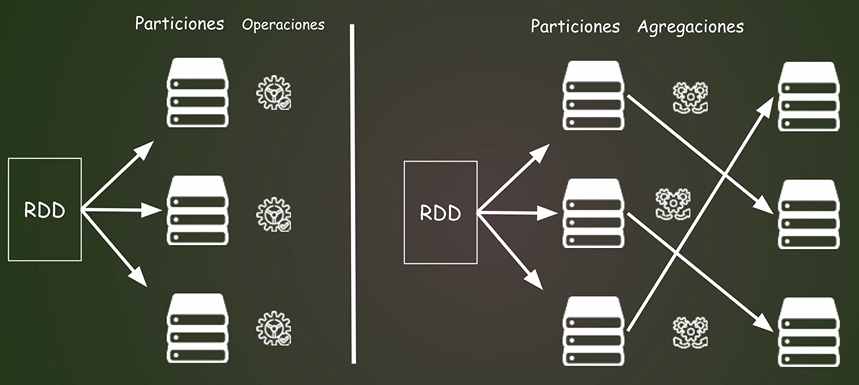

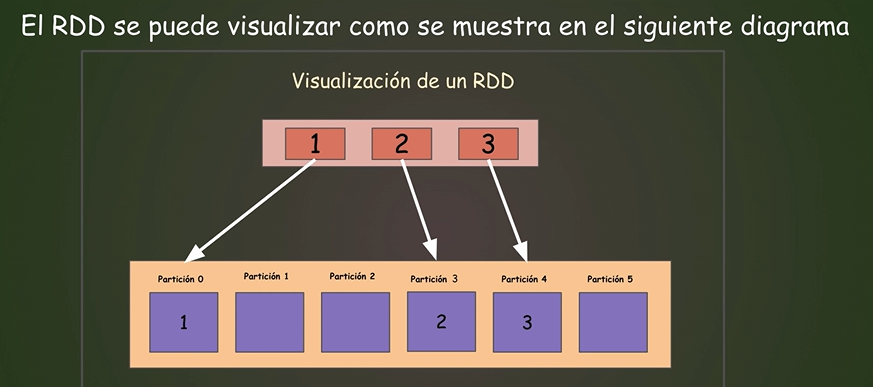

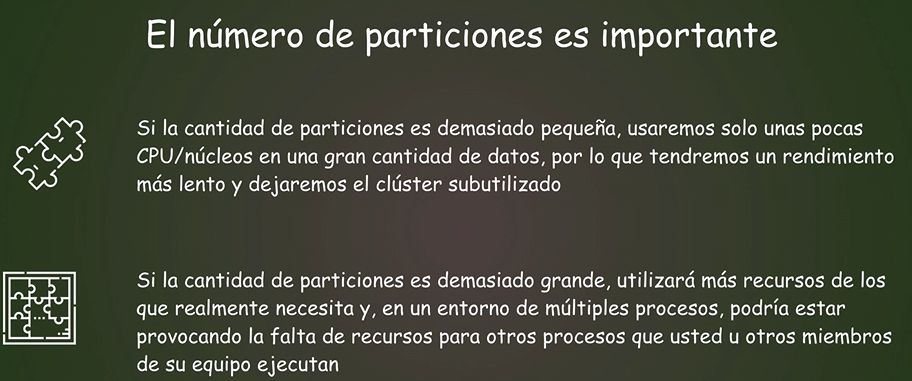

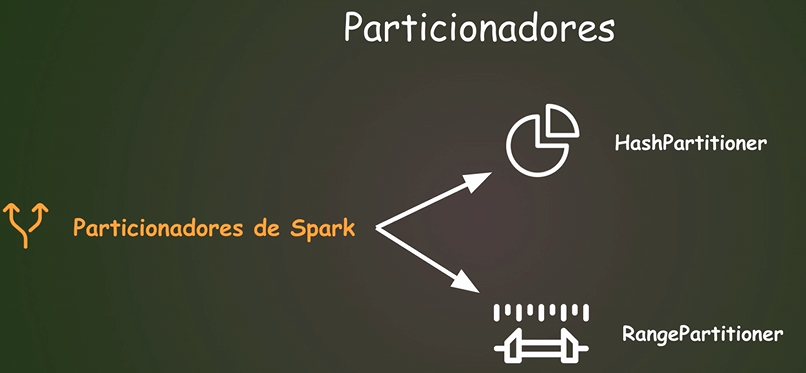

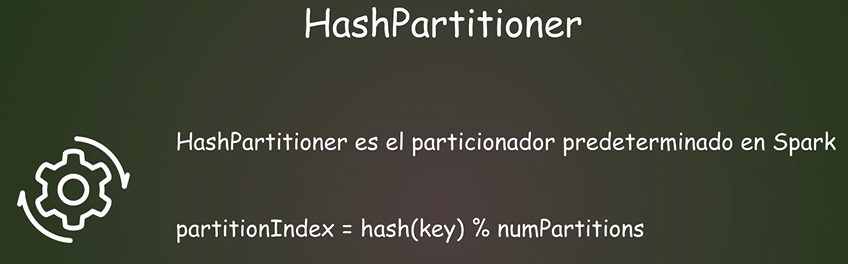

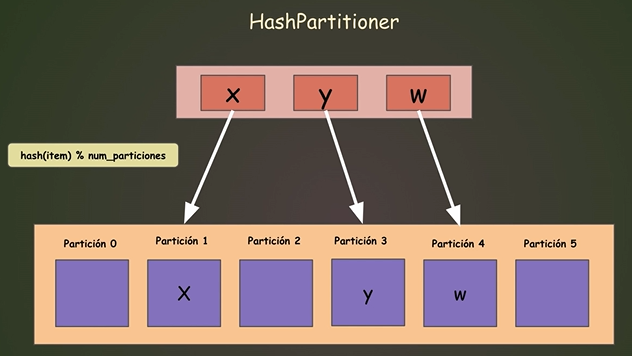

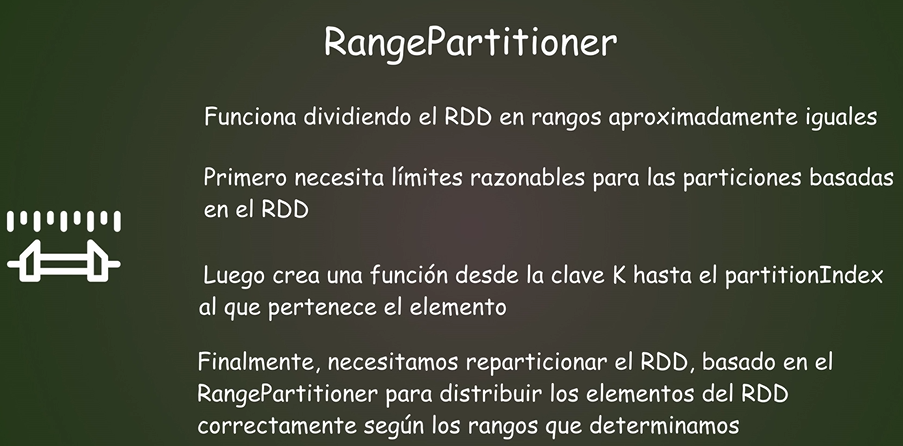

In [40]:
rdd = sc.parallelize(['x', 'y', 'z'])

In [41]:
hola = 'Hola'

In [42]:
hash(hola)

353492840163137645

In [43]:
num_particiones = 6

In [44]:
# indice = hash(item) % num_particiones

In [45]:
hash('x') % num_particiones

2

In [46]:
hash('y') % num_particiones

3

In [47]:
hash('z') % num_particiones

2

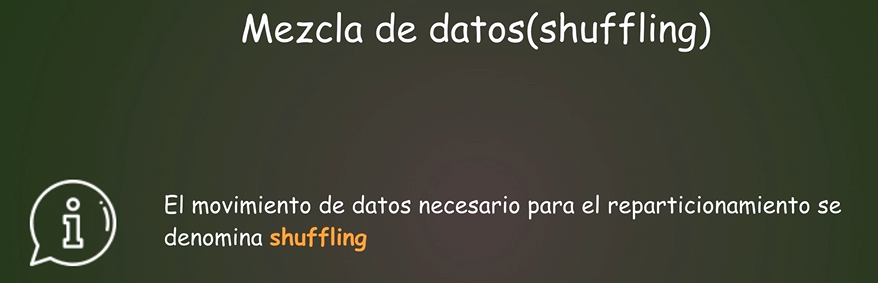

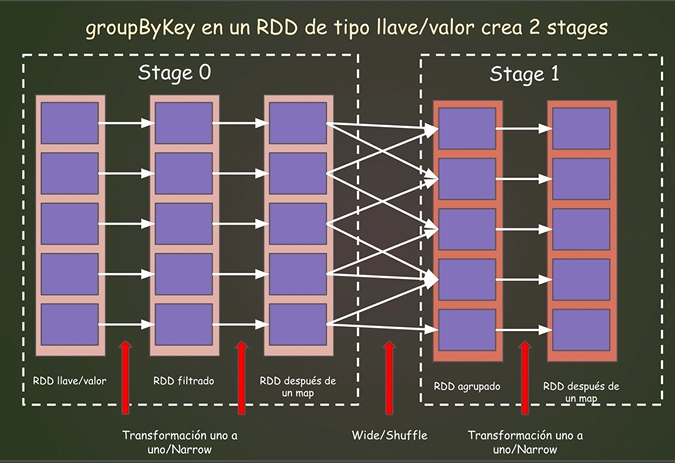

# Broadcast Variable
las variables broadcast son variables compartidas entre todos los ejecutores. Estas se crean una vez en el controlador y luego se leen solo en los ejecutores

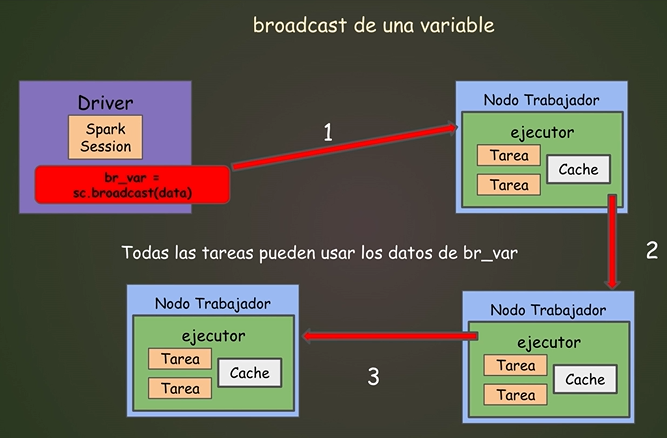

# Broadcast variables

In [49]:
# Broadcast variables
rdd = sc.parallelize([item for item in range(10)])

In [50]:
uno = 1

In [51]:
br_uno = sc.broadcast(uno)

In [52]:
rdd1 = rdd.map(lambda x: x + br_uno.value)

In [53]:
rdd1.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [54]:
# para eliminar un broadcast, pero normal podemos llamar
br_uno.unpersist()

In [55]:
rdd1  = rdd.map(lambda x: x + br_uno.value)

In [56]:
rdd1.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [57]:
#es para eliminar broadcast
br_uno.destroy()

In [59]:
rdd1  = rdd.map(lambda x: x + br_uno.value)

In [60]:
rdd1.take(5)


Py4JJavaError: ignored

# Acumuladores

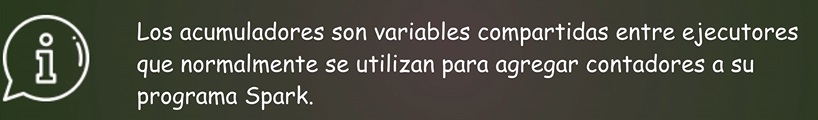

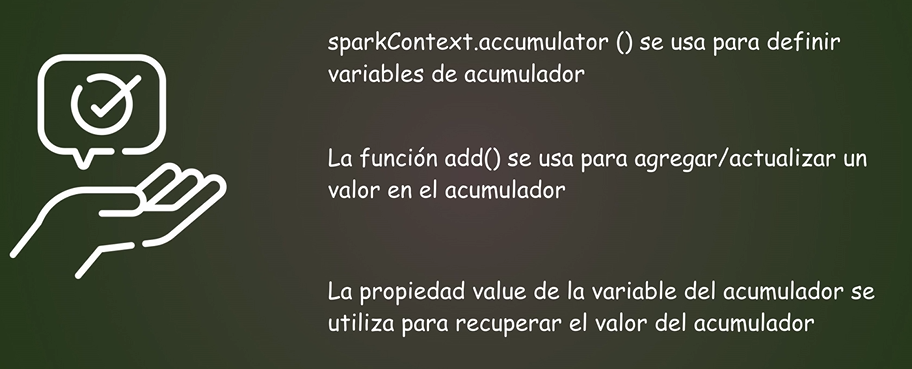

In [61]:
acumulador = sc.accumulator(0)

In [62]:
rdd = sc.parallelize([2,4,6,8,10])

In [63]:
#suma todo los valores de RDD
rdd.foreach(lambda x: acumulador.add(x))

In [64]:
print(acumulador.value)

30


In [65]:
rdd1 = sc.parallelize('Mi nombre es Jose Miguel y me siento genial'.split(' '))

In [66]:
acumulador1 = sc.accumulator(0)

In [67]:
rdd1.foreach(lambda x: acumulador1.add(1))

In [68]:
print(acumulador1.value)

9
